In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from ISLP import load_data
from ISLP.models import ( ModelSpec as MS, summarize )

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
Hitters = load_data('Hitters')
Hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
Hitters = load_data('Hitters')
np.isnan(Hitters['Salary']).sum()

np.int64(59)

In [4]:
Hitters = Hitters.loc[~np.isnan(Hitters['Salary'])]

In [5]:
X = MS(Hitters.columns.drop(['Salary'])).fit_transform(Hitters)
X_train , X_test , y_train , y_test = train_test_split(X, Hitters.Salary, test_size = 0.3, random_state = 0)

In [ ]:
# Adicionar intercepto
from statsmodels.tools import add_constant
X = add_constant(X)

# Modelo e Fit
model = sm.OLS(Hitters['Salary'], X)
res = model.fit()
summarize(res)

,coef,std err,t,P>|t|
intercept,163.1036,90.779,1.797,0.074
AtBat,-1.9799,0.634,-3.123,0.002
Hits,7.5008,2.378,3.155,0.002
HmRun,4.3309,6.201,0.698,0.486
Runs,-2.3762,2.981,-0.797,0.426
RBI,-1.0450,2.601,-0.402,0.688
Walks,6.2313,1.829,3.408,0.001
Years,-3.4891,12.412,-0.281,0.779
CAtBat,-0.1713,0.135,-1.267,0.206
CHits,0.1340,0.675,0.199,0.843


In [17]:
model = LinearRegression()
model.fit (X_train, y_train)
y_pred = model.predict(X_test)
MSE_1 = mean_squared_error(y_test, y_pred)

model = LinearRegression()
model.fit(X_train.drop(columns = ['Assists', 'Errors']), y_train)
y_pred = model.predict(X_test.drop(columns = ['Assists', 'Errors']))
MSE_2 = mean_squared_error(y_test , y_pred)

print(MSE_1)
print(MSE_2)

121776.25594884089
122008.53991131109


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import(ModelSpec as MS, summarize)
from ISLP import confusion_table
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
BrainCancer = load_data('BrainCancer')

In [21]:
X = MS(BrainCancer.columns.drop(['time'])).fit_transform(BrainCancer)
scaler = StandardScaler(with_mean = True , with_std = True , copy = True)
scaler.fit(X)
X_std = scaler.transform(X)

In [22]:
X_train , X_test , y_train , y_test = train_test_split(np.asarray(X_std),BrainCancer.time , test_size =20, random_state =0)

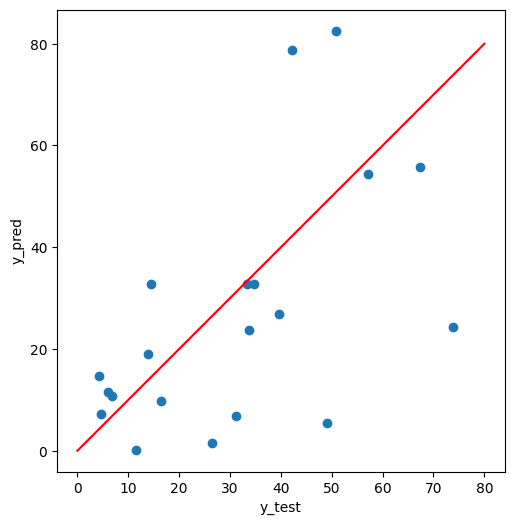

In [ ]:
knn1 = KNeighborsRegressor ( n_neighbors =1)
y_pred = knn1.fit( X_train , y_train ).predict ( X_test )
plt.figure ( figsize =(6, 6) )
plt.scatter ( y_test , y_pred )
plt.plot ([0, 80], [0, 80], color = 'red')
plt.xlabel ("y_test")
plt.ylabel ("y_pred")
plt.axis ("scaled")
plt.show ()

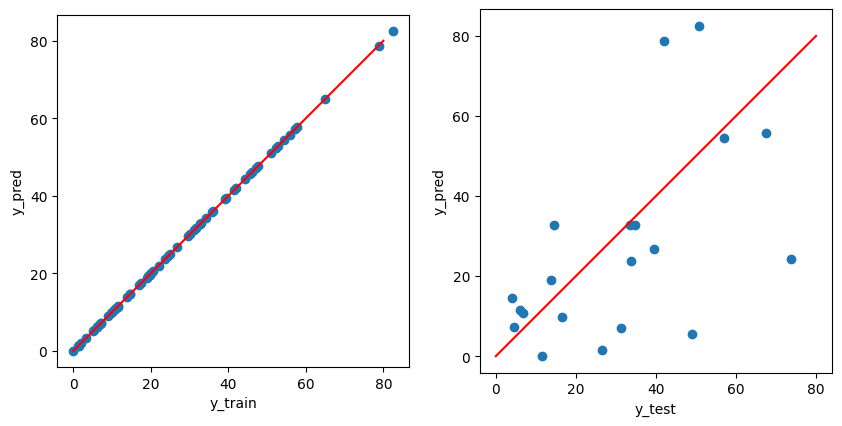

In [47]:
fig, axs = plt.subplots(1,2, figsize=(10,10))

y_prev = knn1.predict(X_train)
axs[0].scatter ( y_train , y_prev )
axs[0].plot ([0, 80], [0, 80], color = 'red')
axs[0].set_xlabel ("y_train")
axs[0].set_ylabel ("y_pred")
axs[0].axis ("scaled")

axs[1].scatter ( y_test, y_pred )
axs[1].plot ([0, 80], [0, 80], color = 'red')
axs[1].set_xlabel ("y_test")
axs[1].set_ylabel ("y_pred")
axs[1].axis ("scaled")

plt.show ()

É esperado vermos que o treino está muito bem ajustado, mas o teste não.

In [ ]:
from sklearn . neighbors import KNeighborsClassifier

y_train_12 = y_train > 12
y_test_12 = y_test > 12

knn1 = KNeighborsClassifier ( n_neighbors =1)
y_train_pred = knn1 . fit( X_train , y_train_12 ) . predict ( X_train )
y_test_pred = knn1 . predict ( X_test )

22    False
6      True
61     True
48    False
79    False
      ...  
84    False
67     True
64     True
47     True
44     True
Name: time, Length: 68, dtype: bool

In [ ]:
acc_train = (y_train_12 & y_train_pred).sum()/len(y_train_12)
acc_test = (y_test_12 & y_test_pred).sum()/len(y_test_12)

confusion = confusion_table(true_labels=y_test_12,predicted_labels=y_test_pred)

0.6617647058823529


np.float64(0.55)